In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore')

## Google Mobility Data

In [2]:
#Import Google mobility data
file_names = ['2020_GB_Region_Mobility_Report_20220706.csv',
              '2021_GB_Region_Mobility_Report_20220706.csv',
              '2022_GB_Region_Mobility_Report_20220706.csv']

df_gl = pd.concat((pd.read_csv(i) for i in file_names))

In [3]:
df_gl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362396 entries, 0 to 76470
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 362396 non-null  object 
 1   country_region                                      362396 non-null  object 
 2   sub_region_1                                        361527 non-null  object 
 3   sub_region_2                                        231538 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     183221 non-null  object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            362396 non-null  object 
 8   date                                                362396 non-nu

In [4]:
#Filter mobility data of Greater London
df_gl = df_gl.loc[df_gl['sub_region_1'] == 'Greater London']
df_gl = df_gl.loc[df_gl['sub_region_2'].isnull()]

In [5]:
#Drop unused columns
df_gl = df_gl.drop(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2', 
              'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id'], axis=1)

In [6]:
#Rename columns
df_gl.rename(columns={"retail_and_recreation_percent_change_from_baseline": "retail_and_recreation",
                   "grocery_and_pharmacy_percent_change_from_baseline": "grocery_and_pharmacy",
                   "parks_percent_change_from_baseline": "parks",
                   "transit_stations_percent_change_from_baseline": "transit_stations",
                   "workplaces_percent_change_from_baseline": "workplaces",
                   "residential_percent_change_from_baseline": "residential"}, inplace = True)

In [7]:
#Convert to date format
df_gl['date'] = pd.to_datetime(df_gl['date'])

In [8]:
df_gl = df_gl.set_index('date') #set date as index

In [9]:
df_gl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 869 entries, 2020-02-15 to 2022-07-02
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   retail_and_recreation  869 non-null    float64
 1   grocery_and_pharmacy   869 non-null    float64
 2   parks                  869 non-null    float64
 3   transit_stations       869 non-null    float64
 4   workplaces             869 non-null    float64
 5   residential            869 non-null    float64
dtypes: float64(6)
memory usage: 47.5 KB


In [10]:
df_gl.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
2020-02-15,-11.0,-8.0,-34.0,-10.0,-3.0,2.0
2020-02-16,-9.0,-11.0,-41.0,-9.0,-4.0,1.0
2020-02-17,11.0,4.0,28.0,-3.0,-13.0,2.0
2020-02-18,4.0,-2.0,11.0,-4.0,-13.0,2.0
2020-02-19,3.0,-3.0,3.0,-5.0,-13.0,3.0


In [11]:
df_gl.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
retail_and_recreation,869.0,-40.706559,20.348014,-92.0,-60.0,-35.0,-25.0,11.0
grocery_and_pharmacy,869.0,-11.868815,11.434700,-84.0,-18.0,-10.0,-4.0,30.0
parks,869.0,8.147296,28.262454,-62.0,-11.0,3.0,26.0,160.0
transit_stations,869.0,-46.907940,17.121504,-92.0,-59.0,-47.0,-35.0,5.0
workplaces,869.0,-40.150748,19.507037,-88.0,-54.0,-42.0,-30.0,1.0
residential,869.0,13.055236,8.574917,-2.0,7.0,12.0,18.0,38.0


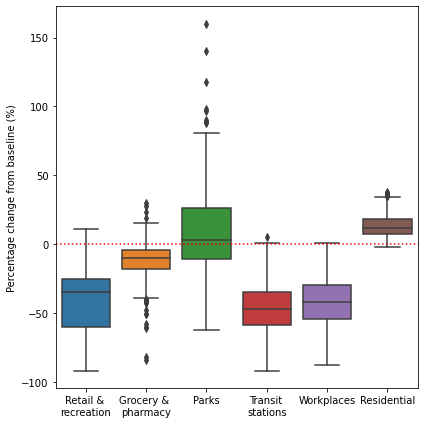

In [12]:
#Boxplot to show the range of the 6 categories
fig = plt.figure(figsize =(6, 6))

boxplot_gl = sns.boxplot(data = df_gl)

boxplot_gl.set_xticklabels(['Retail & \nrecreation','Grocery & \npharmacy','Parks','Transit \nstations','Workplaces','Residential'])
plt.ylabel('Percentage change from baseline (%)')
plt.axhline(y=0, color='red', linestyle='dotted')
plt.tight_layout()
plt.show()

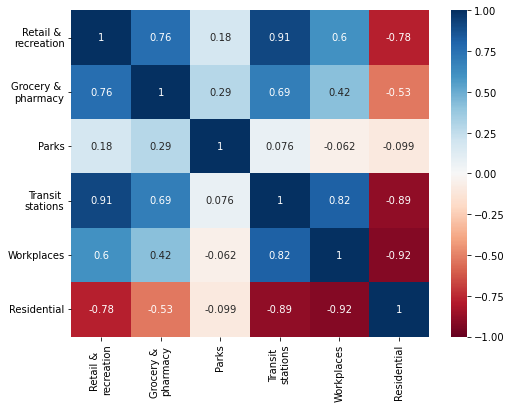

In [13]:
#Heatmap to show the correlation among the 6 categories
plt.figure(figsize = (8,6))
heat_gl = sns.heatmap(df_gl.corr(), cmap="RdBu", center=0, vmin=-1, vmax=1, annot=True)
heat_gl.set_xticklabels(['Retail & \nrecreation','Grocery & \npharmacy','Parks','Transit \nstations','Workplaces','Residential'])
heat_gl.set_yticklabels(['Retail & \nrecreation','Grocery & \npharmacy','Parks','Transit \nstations','Workplaces','Residential'])
plt.show()

## London bike data

In [14]:
df_bike = pd.read_csv('tfl-daily-cycle-hires_20220713.csv')

In [15]:
#Filter columns
df_bike = df_bike.iloc[:,0:2]

In [16]:
#Data transformation
df_bike.rename(columns={"Day": "date"}, inplace=True)
df_bike['Number of Bicycle Hires'] = df_bike['Number of Bicycle Hires'].str.replace(',', '').astype(float)
df_bike['date'] = pd.to_datetime(df_bike['date'], format='%d/%m/%Y')

In [17]:
#Bike baseline (median of bike hires between 2020-1-3 & 2020-2-6)
base_bike = df_bike.loc[(df_bike['date']>='2020-01-03') & (df_bike['date']<='2020-02-06')].median()

In [18]:
#Transform data from no. of bike hires to percentage change from baseline
df_bike['bike'] = df_bike['Number of Bicycle Hires']/base_bike.iloc[0]*100-100

In [19]:
df_bike = df_bike.drop(['Number of Bicycle Hires'], axis=1)

In [20]:
#Filter date to 2020-2-1 onwards
df_bike = df_bike.loc[df_bike['date']>='2020-02-01']

In [21]:
df_bike = df_bike.set_index('date') #set date as index

In [22]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 881 entries, 2020-02-01 to 2022-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bike    881 non-null    float64
dtypes: float64(1)
memory usage: 13.8 KB


In [23]:
df_bike.head()

,bike
date,
2020-02-01,-22.849105
2020-02-02,-38.334030
2020-02-03,7.466829
2020-02-04,12.051857
2020-02-05,12.952895


In [24]:
df_bike.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bike,881.0,15.363806,42.090613,-81.477398,-15.078128,16.370756,45.8845,166.775653


## London tfl public transport

In [25]:
df_tfl = pd.read_csv('tfl-journeys-type_20220713.csv')

In [26]:
#Data transformation
df_tfl['Period beginning'] = pd.to_datetime(df_tfl['Period beginning'])
df_tfl['Period ending'] = pd.to_datetime(df_tfl['Period ending'])
df_tfl = df_tfl.drop(['Period and Financial year','Reporting Period','Days in period'], axis=1)

In [27]:
#Transport baseline (tfl public transport between 2020-1-5 & 2020-2-6)
base_tfl = df_tfl.loc[df_tfl['Period beginning']=='2020-01-05']

In [28]:
#Transform data from no. of journeys to percentage change from baseline
df_tfl['Bus'] = df_tfl['Bus journeys (m)']/base_tfl.iloc[0][2]*100-100
df_tfl['Underground'] = df_tfl['Underground journeys (m)']/base_tfl.iloc[0][3]*100-100
df_tfl['DLR'] = df_tfl['DLR Journeys (m)']/base_tfl.iloc[0][4]*100-100
df_tfl['Tram'] = df_tfl['Tram Journeys (m)']/base_tfl.iloc[0][5]*100-100
df_tfl['Overground'] = df_tfl['Overground Journeys (m)']/base_tfl.iloc[0][6]*100-100
df_tfl['Emirates Airline'] = df_tfl['Emirates Airline Journeys (m)']/base_tfl.iloc[0][7]*100-100
df_tfl['TfL Rail'] = df_tfl['TfL Rail Journeys (m)']/base_tfl.iloc[0][8]*100-100

In [29]:
#Drop columns
df_tfl = df_tfl.drop(['Period beginning','Bus journeys (m)','Underground journeys (m)','DLR Journeys (m)','Tram Journeys (m)',
                      'Overground Journeys (m)','Emirates Airline Journeys (m)','TfL Rail Journeys (m)',
                      'Emirates Airline'], axis=1)

In [30]:
#Rename columns
df_tfl.rename(columns={"Period ending": "date"}, inplace=True)

In [31]:
#Filter date to 2020-2-1 onwards
df_tfl = df_tfl.loc[df_tfl['date']>='2020-01-05']

In [32]:
df_tfl = df_tfl.set_index('date') #set date as index

In [33]:
df_tfl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2020-02-01 to 2022-05-28
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bus          31 non-null     float64
 1   Underground  31 non-null     float64
 2   DLR          31 non-null     float64
 3   Tram         31 non-null     float64
 4   Overground   31 non-null     float64
 5   TfL Rail     31 non-null     float64
dtypes: float64(6)
memory usage: 1.7 KB


In [34]:
df_tfl.head()

,Bus,Underground,DLR,Tram,Overground,TfL Rail
date,,,,,,
2020-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-29,-2.479339,0.378072,1.086957,-4.347826,10.638298,-8.771930
2020-03-31,-25.383707,-42.438563,-33.695652,-30.434783,-7.801418,-38.596491
2020-05-02,-82.172373,-94.612476,-86.956522,-82.608696,-92.907801,-89.473684
2020-05-30,-80.814640,-93.667297,-84.782609,-78.260870,-89.361702,-87.719298


In [35]:
df_tfl.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bus,31.0,-41.131889,21.159481,-82.172373,-56.286895,-39.787485,-25.295159,0.000000
Underground,31.0,-55.049088,25.326930,-94.612476,-75.803403,-57.088847,-36.153119,0.378072
DLR,31.0,-45.196353,22.716740,-86.956522,-62.500000,-45.652174,-28.804348,1.086957
Tram,31.0,-43.899018,19.648930,-82.608696,-56.521739,-43.478261,-30.434783,0.000000
Overground,31.0,-40.517044,28.813734,-92.907801,-64.893617,-39.716312,-15.602837,10.638298
TfL Rail,31.0,-53.706848,21.831017,-89.473684,-68.421053,-56.140351,-42.982456,0.000000


## Covid cases

In [36]:
df_cases = pd.read_csv('region_2022-07-06_london_cases.csv')

In [37]:
df_cases = df_cases.drop(['areaCode', 'areaName', 'areaType'], axis=1)

In [38]:
#Rename column names
df_cases.rename(columns={"newCasesBySpecimenDate": "New Cases", "newDeaths28DaysByDeathDate": "Death Cases"}, inplace = True)

In [39]:
df_cases['date'] = pd.to_datetime(df_cases['date'], format='%Y-%m-%d')

In [40]:
df_cases = df_cases.set_index('date')

In [41]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 884 entries, 2022-07-05 to 2020-02-03
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   New Cases    884 non-null    int64  
 1   Death Cases  849 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 20.7 KB


In [42]:
df_cases.head()

,New Cases,Death Cases
date,,
2022-07-05,4052,10.0
2022-07-04,4326,10.0
2022-07-03,3627,11.0
2022-07-02,2822,14.0
2022-07-01,3048,5.0


In [43]:
df_cases.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
New Cases,884.0,3370.866516,5227.195039,0.0,332.0,1627.5,3907.0,36922.0
Death Cases,849.0,23.990577,42.605390,0.0,3.0,10.0,19.0,232.0


In [44]:
#df_cases.to_csv('region_2022-07-06_london_cases_format.csv', index = True)

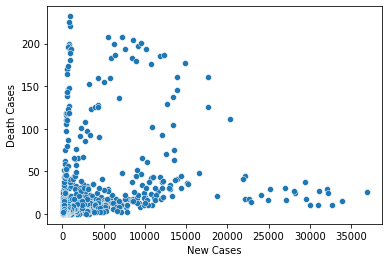

In [45]:
sns.scatterplot(data=df_cases, x="New Cases", y="Death Cases")
plt.show()

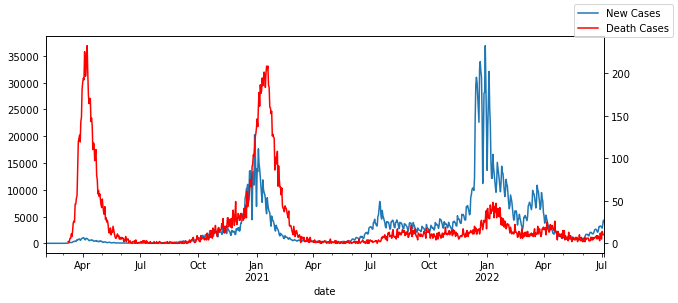

In [46]:
ax = df_cases.plot(y="New Cases", legend=False, figsize = (10,4))
ax2 = ax.twinx()
df_cases.plot(y="Death Cases", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

## OxCGRT stringency index

In [47]:
df_ox = pd.read_csv('OxCGRT_latest_combined_20220706.csv')

In [48]:
df_ox = df_ox.loc[df_ox['RegionName'] == 'England']

In [49]:
df_ox = df_ox.drop(df_ox.iloc[:, 6:49],axis=1)
df_ox = df_ox.drop(df_ox.iloc[:, 0:5],axis=1)
df_ox = df_ox.drop(df_ox.iloc[:, 2:13],axis=1)

In [50]:
#Rename columns
df_ox.rename(columns={"Date": "date"}, inplace=True)

In [51]:
df_ox['date'] = pd.to_datetime(df_ox['date'], format='%Y%m%d')

In [52]:
df_ox = df_ox.set_index('date')

In [53]:
df_ox.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 918 entries, 2020-01-01 to 2022-07-06
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StringencyIndexForDisplay  904 non-null    float64
dtypes: float64(1)
memory usage: 14.3 KB


In [54]:
df_ox.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
StringencyIndexForDisplay,904.0,45.534956,27.531509,0.0,22.455,52.78,66.2,87.96


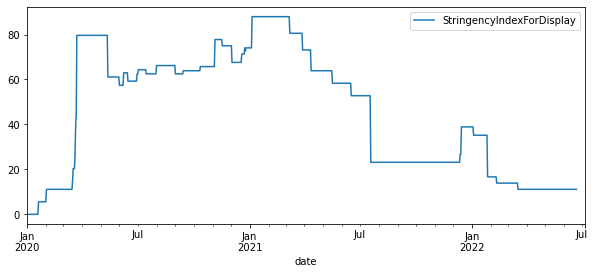

In [55]:
df_ox.plot(figsize = (10,4))
plt.show()

## Stringency index vs Covid cases

In [56]:
df_oxcases = pd.merge(df_ox, df_cases, on='date', how='left')

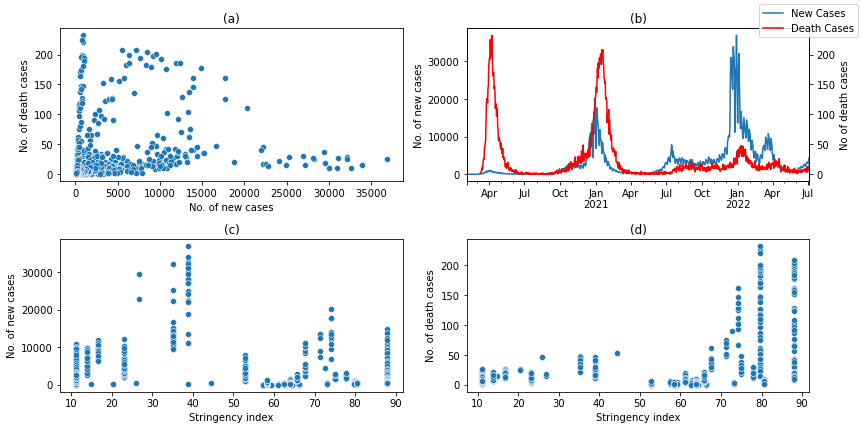

In [57]:
fig, ax = plt.subplots(2,2, figsize=(12,6))

sc1 = sns.scatterplot(data=df_cases, x="New Cases", y="Death Cases", ax=ax[0,0])
sc3 = sns.scatterplot(data=df_oxcases, x="StringencyIndexForDisplay", y="New Cases", ax=ax[1,0])
sc4 = sns.scatterplot(data=df_oxcases, x="StringencyIndexForDisplay", y="Death Cases", ax=ax[1,1])

ax1 = df_cases.plot(y="New Cases", legend=False, ax=ax[0,1])
ax2 = ax1.twinx()
df_cases.plot(y="Death Cases", ax=ax2, legend=False, color="r")
ax2.figure.legend(loc='upper right')
plt.ylabel('No of death cases')

sc1.set(xlabel="No. of new cases", ylabel="No. of death cases", title="(a)")
ax1.set(xlabel="", ylabel="No. of new cases", title="(b)")
sc3.set(xlabel="Stringency index", ylabel="No. of new cases", title="(c)")
sc4.set(xlabel="Stringency index", ylabel="No. of death cases", title="(d)")

plt.tight_layout()
plt.show()

## Merge Google mobility, Covid cases and Stringency index dataset

In [58]:
df_all = pd.merge(df_gl, df_oxcases, on='date', how='left')

In [59]:
df_all = df_all.reset_index()

In [60]:
df_all['retail_and_recreation'] = df_all['retail_and_recreation'].rolling(7, min_periods=1).mean()
df_all['grocery_and_pharmacy'] = df_all['grocery_and_pharmacy'].rolling(7, min_periods=1).mean()
df_all['parks'] = df_all['parks'].rolling(7, min_periods=1).mean()
df_all['transit_stations'] = df_all['transit_stations'].rolling(7, min_periods=1).mean()
df_all['workplaces'] = df_all['workplaces'].rolling(7, min_periods=1).mean()
df_all['residential'] = df_all['residential'].rolling(7, min_periods=1).mean()

In [61]:
df_all.rename(columns={'date':'Date',
                       'retail_and_recreation':'Retail & recreation',
                       'grocery_and_pharmacy':'Grocery & pharmacy',
                       'parks':'Parks',
                       'transit_stations':'Transit stations',
                       'workplaces':'Workplaces',
                       'residential':'Residential',
                       'StringencyIndexForDisplay':'Stringency Index'}, inplace=True)

In [62]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 869 non-null    datetime64[ns]
 1   Retail & recreation  869 non-null    float64       
 2   Grocery & pharmacy   869 non-null    float64       
 3   Parks                869 non-null    float64       
 4   Transit stations     869 non-null    float64       
 5   Workplaces           869 non-null    float64       
 6   Residential          869 non-null    float64       
 7   Stringency Index     859 non-null    float64       
 8   New Cases            869 non-null    float64       
 9   Death Cases          846 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 68.0 KB


In [63]:
df_all = pd.melt(df_all, id_vars=['Date'], 
                 value_vars=['Retail & recreation','Grocery & pharmacy', 'Parks',
                            'Transit stations','Workplaces','Residential',
                             'Stringency Index','New Cases',
                            'Death Cases'])

In [64]:
df_all

,Date,variable,value
0,2020-02-15,Retail & recreation,-11.00
1,2020-02-16,Retail & recreation,-10.00
2,2020-02-17,Retail & recreation,-3.00
3,2020-02-18,Retail & recreation,-1.25
4,2020-02-19,Retail & recreation,-0.40
...,...,...,...
7816,2022-06-28,Death Cases,3.00
7817,2022-06-29,Death Cases,12.00
7818,2022-06-30,Death Cases,7.00
7819,2022-07-01,Death Cases,5.00


In [65]:
#df_all.to_csv('merged_dataset_rolling.csv', index = False)

## Validate Google mobility data with TfL transport data

In [66]:
df_tflgl = pd.merge(df_tfl, df_gl, on='date', how='left')

In [67]:
df_tflgl.head()

,Bus,Underground,DLR,Tram,Overground,TfL Rail,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,,,,,,,
2020-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,-2.479339,0.378072,1.086957,-4.347826,10.638298,-8.771930,-2.0,0.0,-21.0,-5.0,0.0,1.0
2020-03-31,-25.383707,-42.438563,-33.695652,-30.434783,-7.801418,-38.596491,-79.0,-35.0,-30.0,-79.0,-78.0,34.0
2020-05-02,-82.172373,-94.612476,-86.956522,-82.608696,-92.907801,-89.473684,-81.0,-31.0,-17.0,-71.0,-54.0,20.0
2020-05-30,-80.814640,-93.667297,-84.782609,-78.260870,-89.361702,-87.719298,-74.0,-20.0,48.0,-61.0,-35.0,14.0


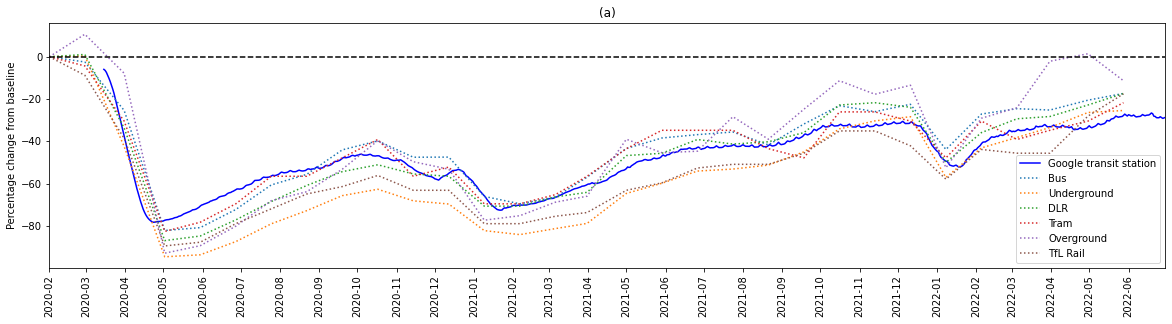

In [68]:
tfl_label = ['Bus','Underground','DLR','Tram','Overground','TfL Rail'] #legend labels

plt.figure(figsize = (20,5))

#Google transit station data
plt.plot(df_gl.drop(['retail_and_recreation','grocery_and_pharmacy',
                     'parks','workplaces','residential'], axis=1).rolling(30).mean(), 
         color='blue', label='Google transit station')

#TfL public transport data
plt.plot(df_tflgl.drop(['retail_and_recreation','grocery_and_pharmacy',
                        'parks','workplaces','residential','transit_stations'], axis=1), 
         linestyle='dotted', label=tfl_label)

plt.legend(loc="lower right")
plt.axhline(y=0, color='black', linestyle='dashed')
plt.ylabel('Percentage change from baseline')
plt.title('(a)')


ax_tfl = plt.gca()
ax_tfl.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax_tfl.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate(rotation=90, ha="center")

datemin = datetime.date(2020, 2, 1)
datemax = datetime.date(2022, 6, 30)
ax_tfl.set_xlim(datemin, datemax)

plt.show()

## Validate Google mobility data with London bike data

In [69]:
df_glbike = pd.merge(df_gl, df_bike, on='date', how='left')

In [70]:
df_glbike.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,bike
date,,,,,,,
2020-02-15,-11.0,-8.0,-34.0,-10.0,-3.0,2.0,-62.616432
2020-02-16,-9.0,-11.0,-41.0,-9.0,-4.0,1.0,-75.234764
2020-02-17,11.0,4.0,28.0,-3.0,-13.0,2.0,-2.167053
2020-02-18,4.0,-2.0,11.0,-4.0,-13.0,2.0,-3.934912
2020-02-19,3.0,-3.0,3.0,-5.0,-13.0,3.0,-7.622705


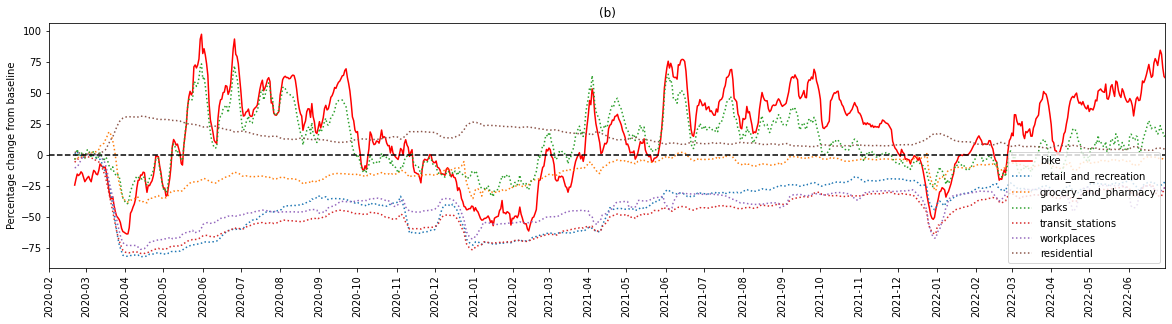

In [71]:
gl_label = ['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces','residential'] #legend labels

plt.figure(figsize = (20,5))

#London bike data
plt.plot(df_glbike.drop(['retail_and_recreation','grocery_and_pharmacy',
                        'parks','workplaces','residential','transit_stations'], axis=1).rolling(7).mean(), 
         color='red', label='bike')

#Google transit station data
plt.plot(df_glbike.drop(['bike'], axis=1).rolling(7).mean(), linestyle='dotted', label=gl_label)


plt.legend(loc="lower right")
plt.axhline(y=0, color='black', linestyle='dashed')
plt.ylabel('Percentage change from baseline')
plt.title('(b)')


ax_tfl = plt.gca()
ax_tfl.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax_tfl.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate(rotation=90, ha="center")

datemin = datetime.date(2020, 2, 1)
datemax = datetime.date(2022, 6, 30)
ax_tfl.set_xlim(datemin, datemax)

plt.show()

## Google mobility by London borough

In [72]:
#Import Google mobility data
file_names = ['2020_GB_Region_Mobility_Report_20220706.csv',
              '2021_GB_Region_Mobility_Report_20220706.csv',
              '2022_GB_Region_Mobility_Report_20220706.csv']

df_glb = pd.concat((pd.read_csv(i) for i in file_names))

In [73]:
#Filter mobility data of London boroughs
df_glb = df_glb.loc[df_glb['sub_region_1'] == 'Greater London']
df_glb = df_glb.dropna(subset=['sub_region_2'])

In [74]:
#Drop unused columns
df_glb = df_glb.drop(['country_region_code', 'country_region', 'sub_region_1',  
              'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id'], axis=1)

In [75]:
#Rename column names
df_glb.rename(columns={"sub_region_2":"borough",
                   "retail_and_recreation_percent_change_from_baseline": "Retail & recreation",
                   "grocery_and_pharmacy_percent_change_from_baseline": "Grocery & pharmacy",
                   "parks_percent_change_from_baseline": "Parks",
                   "transit_stations_percent_change_from_baseline": "Transit stations",
                   "workplaces_percent_change_from_baseline": "Workplaces",
                   "residential_percent_change_from_baseline": "Residential"}, inplace = True)

In [76]:
df_glb = df_glb.sort_values(by=['borough','date'])

In [77]:
#Rolling mean
df_glb['Retail & recreation'] = df_glb['Retail & recreation'].rolling(7, min_periods=1).mean()
df_glb['Grocery & pharmacy'] = df_glb['Grocery & pharmacy'].rolling(7, min_periods=1).mean()
df_glb['Parks'] = df_glb['Parks'].rolling(7, min_periods=1).mean()
df_glb['Transit stations'] = df_glb['Transit stations'].rolling(7, min_periods=1).mean()
df_glb['Workplaces'] = df_glb['Workplaces'].rolling(7, min_periods=1).mean()
df_glb['Residential'] = df_glb['Residential'].rolling(7, min_periods=1).mean()

In [78]:
#Rename columns
df_glb = df_glb.replace('London Borough of ','', regex=True)
df_glb = df_glb.replace('Royal Borough of ','', regex=True)

In [79]:
df_glb = df_glb.set_index('date') #set date as index

In [80]:
df_glb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28677 entries, 2020-02-15 to 2022-07-02
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   borough              28677 non-null  object 
 1   Retail & recreation  28677 non-null  float64
 2   Grocery & pharmacy   28677 non-null  float64
 3   Parks                28239 non-null  float64
 4   Transit stations     28677 non-null  float64
 5   Workplaces           28654 non-null  float64
 6   Residential          27808 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.8+ MB


In [81]:
df_glb

,borough,Retail & recreation,Grocery & pharmacy,Parks,Transit stations,Workplaces,Residential
date,,,,,,,
2020-02-15,City of London,-5.000000,-9.000000,-12.000000,-11.000000,NaN,NaN
2020-02-16,City of London,-3.000000,-15.000000,-17.500000,-12.000000,NaN,NaN
2020-02-17,City of London,-3.000000,-10.666667,-10.333333,-8.333333,-4.000000,NaN
2020-02-18,City of London,-2.750000,-8.500000,-8.000000,-6.750000,-3.000000,NaN
2020-02-19,City of London,-3.600000,-7.600000,-5.400000,-5.400000,-3.333333,NaN
...,...,...,...,...,...,...,...
2022-06-28,Kingston upon Thames,-17.285714,-4.571429,115.000000,-29.285714,-25.285714,5.571429
2022-06-29,Kingston upon Thames,-17.857143,-5.142857,115.000000,-28.571429,-24.571429,5.428571
2022-06-30,Kingston upon Thames,-17.857143,-5.428571,115.000000,-25.285714,-23.428571,4.714286


In [82]:
#df_glb.to_csv('google_mobility_london_boroughs_2.csv', index = True)

In [83]:
df_glb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Retail & recreation,28677.0,-35.085058,23.580297,-97.142857,-52.857143,-28.285714,-16.714286,19.857143
Grocery & pharmacy,28677.0,-10.615523,15.293432,-84.571429,-16.500000,-8.142857,-0.571429,34.000000
Parks,28239.0,31.189282,49.243462,-92.142857,1.142857,23.000000,55.535714,309.428571
Transit stations,28677.0,-44.402898,17.786071,-93.571429,-57.428571,-41.571429,-32.571429,11.142857
Workplaces,28654.0,-41.233591,15.127935,-86.750000,-50.285714,-39.857143,-31.285714,3.400000
Residential,27808.0,12.873251,7.395395,0.000000,7.428571,11.000000,17.285714,37.800000


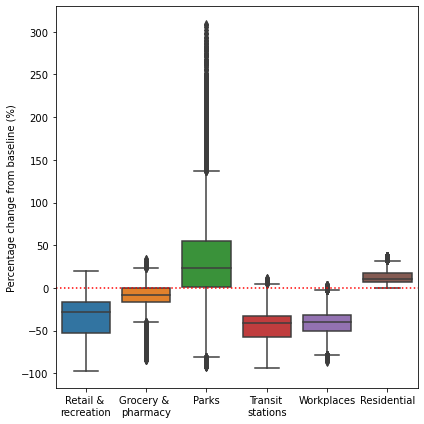

In [84]:
#Boxplot to show the range of the 6 categories
fig = plt.figure(figsize =(6, 6))

boxplot_glb = sns.boxplot(data = df_glb)

boxplot_glb.set_xticklabels(['Retail & \nrecreation','Grocery & \npharmacy','Parks','Transit \nstations','Workplaces','Residential'])
plt.ylabel('Percentage change from baseline (%)')
plt.axhline(y=0, color='red', linestyle='dotted')
plt.tight_layout()
plt.show()

## Create Restriction file for vis 2

In [85]:
df_restrict_daily = pd.read_csv('restrictions_daily_20220706.csv')
df_restrict_summary = pd.read_csv('restrictions_summary_20220706.csv')

In [86]:
df_restrict = pd.merge(df_restrict_daily, df_restrict_summary, on='date', how='left')

In [87]:
df_restrict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 707
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date                               702 non-null    object 
 1   schools_closed_x                   702 non-null    float64
 2   pubs_closed_x                      702 non-null    float64
 3   shops_closed_x                     702 non-null    float64
 4   eating_places_closed_x             702 non-null    float64
 5   stay_at_home_x                     702 non-null    float64
 6   household_mixing_indoors_banned_x  702 non-null    float64
 7   wfh_x                              702 non-null    float64
 8   rule_of_6_indoors_x                702 non-null    float64
 9   curfew_x                           702 non-null    float64
 10  eat_out_to_help_out_x              702 non-null    float64
 11  restriction                        28 non-null     object 

In [88]:
df_restrict = df_restrict.drop(df_restrict.iloc[:, 1:11],axis=1)
df_restrict = df_restrict.drop(df_restrict.iloc[:, 2:13],axis=1)

In [89]:
df_restrict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 707
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         702 non-null    object
 1   restriction  28 non-null     object
dtypes: object(2)
memory usage: 16.6+ KB


In [90]:
df_restrict.fillna(method='ffill', inplace = True)

In [91]:
df_restrict['date'] = pd.to_datetime(df_restrict['date'], format='%d/%m/%Y')

In [92]:
#df_restrict.to_csv('restrictions_daily_20220706_format.csv', index = False)

## Create Stringency index file for pie chart

In [93]:
df_ox["inverted_index"] = 100 - df_ox["StringencyIndexForDisplay"]

#Rename columns
df_ox.rename(columns={"StringencyIndexForDisplay": "Stringency Index"}, inplace=True)

df_ox = df_ox.reset_index()

df_ox_melt = pd.melt(df_ox, id_vars=['date'], 
                 value_vars=['Stringency Index','inverted_index'])

#df_ox_melt.to_csv('Stringency_index.csv', index = False)